In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Optional

In [2]:
def plot_img(img, show_by_cv = False):
    if not show_by_cv:
        fig=plt.figure(figsize=(10, 8))
        _img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(_img)
        plt.show()
    else:
        cv2.imshow("img", img)

In [3]:
img_orig = cv2.imread('bbox.jpg')
plot_img(img_orig)
print(img_orig.shape)

(370, 1224, 3)


In [6]:
def text_size(text, font, scale, thickness):
    size = cv2.getTextSize(text, font, scale, thickness)
    return (size[0][0], size[0][1]+size[1])

def overlay_log(img:np.ndarray, logs:List[dict], over_img=False)-> np.ndarray:
    block_offset= 10
    vertical_offset = 10
    th, tw, depth = img.shape
    img_overlayed = img.copy()
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale              = 0.5
    fontColor              = (255,0,0)
    thickness               = 1
    x, y, w, h = 0, 0, 0, 0
    all_texts = []
    for section in logs:
        iw, ih = 0, 0
        sec_texts = {}
        for item in section.items():
            text = f"{item[0]}: {item[1]}"
            size = text_size(text, font, fontScale, thickness)
            iw = max(iw, size[0])
            ih += size[1]
            sec_texts[text]= (iw, ih)
        w += iw + block_offset
        h = max(h, ih)
        all_texts.append(sec_texts)
    h += vertical_offset
    
    if not over_img:
        img_overlayed = np.zeros((img.shape[0] + h, img.shape[1], img.shape[2]), dtype=np.uint8)
        img_overlayed[y+h:,x:] = img
    
    else:
        sub_img = img_orig[y:y+h, x:x+w]
        white_rect = np.ones(sub_img.shape, dtype=np.uint8) * 255
        alpha = 0.5
        res = cv2.addWeighted(sub_img, alpha, white_rect, 1-alpha, 1.0)    
        img_overlayed[y:y+h, x:x+w] = res 
        
    for i in range(len(all_texts)):
        w_off = i * (max([x[0] for x in list(all_texts[i].values())])+block_offset)
        for item in all_texts[i].items():
            img_overlayed = cv2.putText(img_overlayed,item[0], (w_off, item[1][1]), font, fontScale,fontColor, thickness)
    return img_overlayed

In [8]:
%%time
logs = [{
             "key1":"value1", 
             "key2": 123565,
             "key3": (1254,2553)
        },
        {
             "key1":"value1", 
             "key2": 123565,
             "key3": (1254,2553)
        },
        {
             "key1":"value1", 
             "key2": 123565,
             "key3": (1254,2553)
        },
        {
             "key1":"value1", 
             "key2": 123565,
             "key3": (1254,2553)
        },
        {
             "key1":"value1", 
             "key2": 123565,
             "key3": (1254,2553)
        }
]
over_img = overlay_log(img_orig, logs, True)
plot_img(over_img)
cv2.imwrite("annotated1.jpg", over_img)

CPU times: user 198 ms, sys: 0 ns, total: 198 ms
Wall time: 183 ms


True

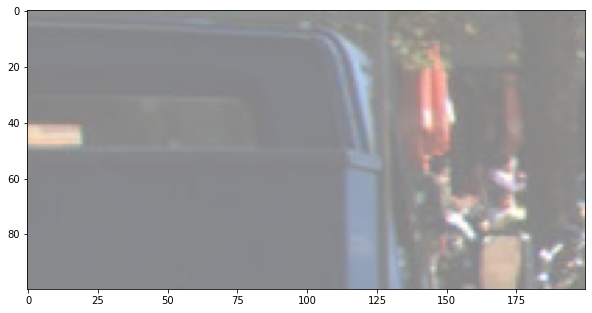

In [29]:
text  =  'HELLO WORLD!'
x, y, w, h = 100, 100, 200, 100
sub_img = img_orig[y:y+h, x:x+w]
plot_img(sub_img)

white_rect = np.ones(sub_img.shape, dtype=np.uint8) * 255
alpha = 0.7
res = cv2.addWeighted(sub_img, alpha, white_rect, 1-alpha, 1.0)
plot_img(res)
# Putting the image back to its position
img_overlayed = img_orig.copy()
img_overlayed[y:y+h, x:x+w] = res
plot_img(img_overlayed)

In [35]:
text_size("this is application")

(158, 14)

In [49]:
dicta ={"a":1231, "B": (125,6654)}
for item in dicta.items():
    print(f"{item[0]}: {item[1]}")

a: 1231
B: (125, 6654)


In [59]:
logs[0].values()[0]

TypeError: 'dict_values' object is not subscriptable